In [21]:
#library(zoo)
library(glue)
library(dplyr)
#library(rstan)
library(tidyr)
library(ggplot2)
#library(ggrepel)
library(ggthemes)
library(lubridate)
library(tidyverse)
#library(flexdashboard)
library(futile.logger)

# load code from other files in this package
source("globals.R")

In [22]:
install.packages("flexdashboard")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [23]:
df <- read_csv(file.path(RAW_DATA_DIR, "exercise_dates.csv")) %>%
  select(date, Amit) %>%
  mutate(date=ymd(date))

df$week <- cut(as.Date(df$date), "week")
head(df)

Parsed with column specification:
cols(
  date = col_character(),
  Amit = col_double(),
  Nidhi = col_double()
)



date,Amit,week
<date>,<dbl>,<fct>
2021-04-01,1,2021-03-29
2021-03-31,1,2021-03-29
2021-03-30,1,2021-03-29
2021-03-29,1,2021-03-29
2021-03-27,1,2021-03-22
2021-03-25,1,2021-03-22


In [24]:
df_workouts_per_week <- df %>%
  arrange(date) %>%
  count(week)

head(df_workouts_per_week)

week,n
<fct>,<int>
2020-01-06,1
2020-01-13,1
2020-01-20,2
2020-01-27,2
2020-02-03,2
2020-02-10,2


In [25]:
df_5_days_a_week <- df_workouts_per_week %>%
  mutate(week=ymd(week)) %>%
  filter(n==5)
max(df_5_days_a_week$week)

[1] "2021-03-22"

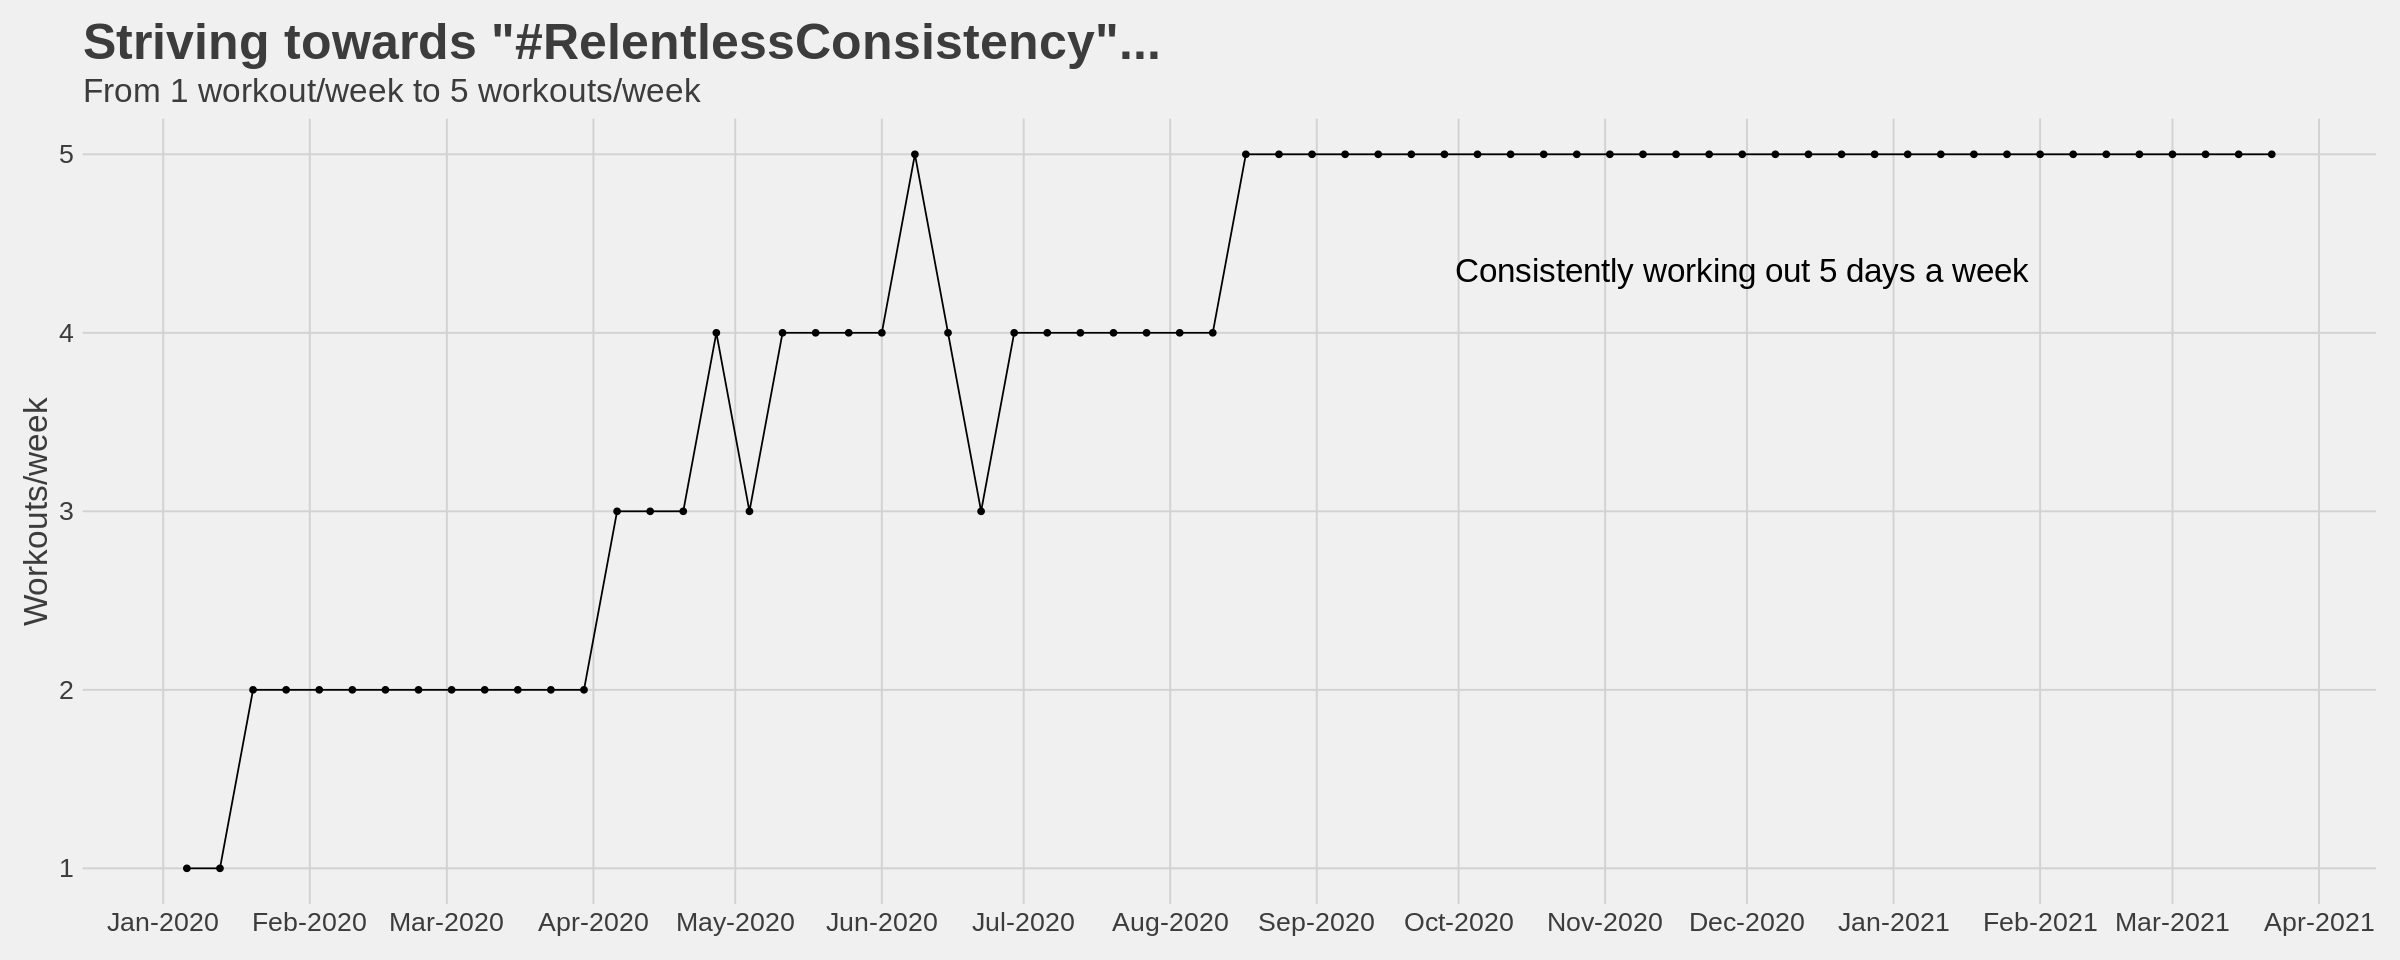

In [26]:
options(repr.plot.width=20, repr.plot.height=8)
df_5_days_a_week <- df_workouts_per_week %>%
  mutate(week=ymd(week)) %>%
  filter(n==5)
title <- "Striving towards \"#RelentlessConsistency\"..."
subtitle <- "From 1 workout/week to 5 workouts/week"
p <- df_workouts_per_week %>%
  filter(ymd(week) != max(ymd(week))) %>%
  ggplot(aes(x=ymd(week), y=n)) +
  geom_point() + 
  geom_line() +
  annotate("text", x=min(df_5_days_a_week$week)+175, y=4.35, label="Consistently working out 5 days a week", size=7) +  
  #geom_smooth("loess") +
  scale_y_continuous(breaks=seq(1,6,1)) +
  scale_x_date(date_breaks = "1 month", date_labels="%b-%Y") +
  theme_fivethirtyeight() + 
  labs(title=title,
       subtitle=subtitle) +
  theme(legend.position="none") +
  theme(axis.title = element_text(), axis.title.x = element_blank(), text = element_text(size=20)) + 
  ylab('Workouts/week')
p

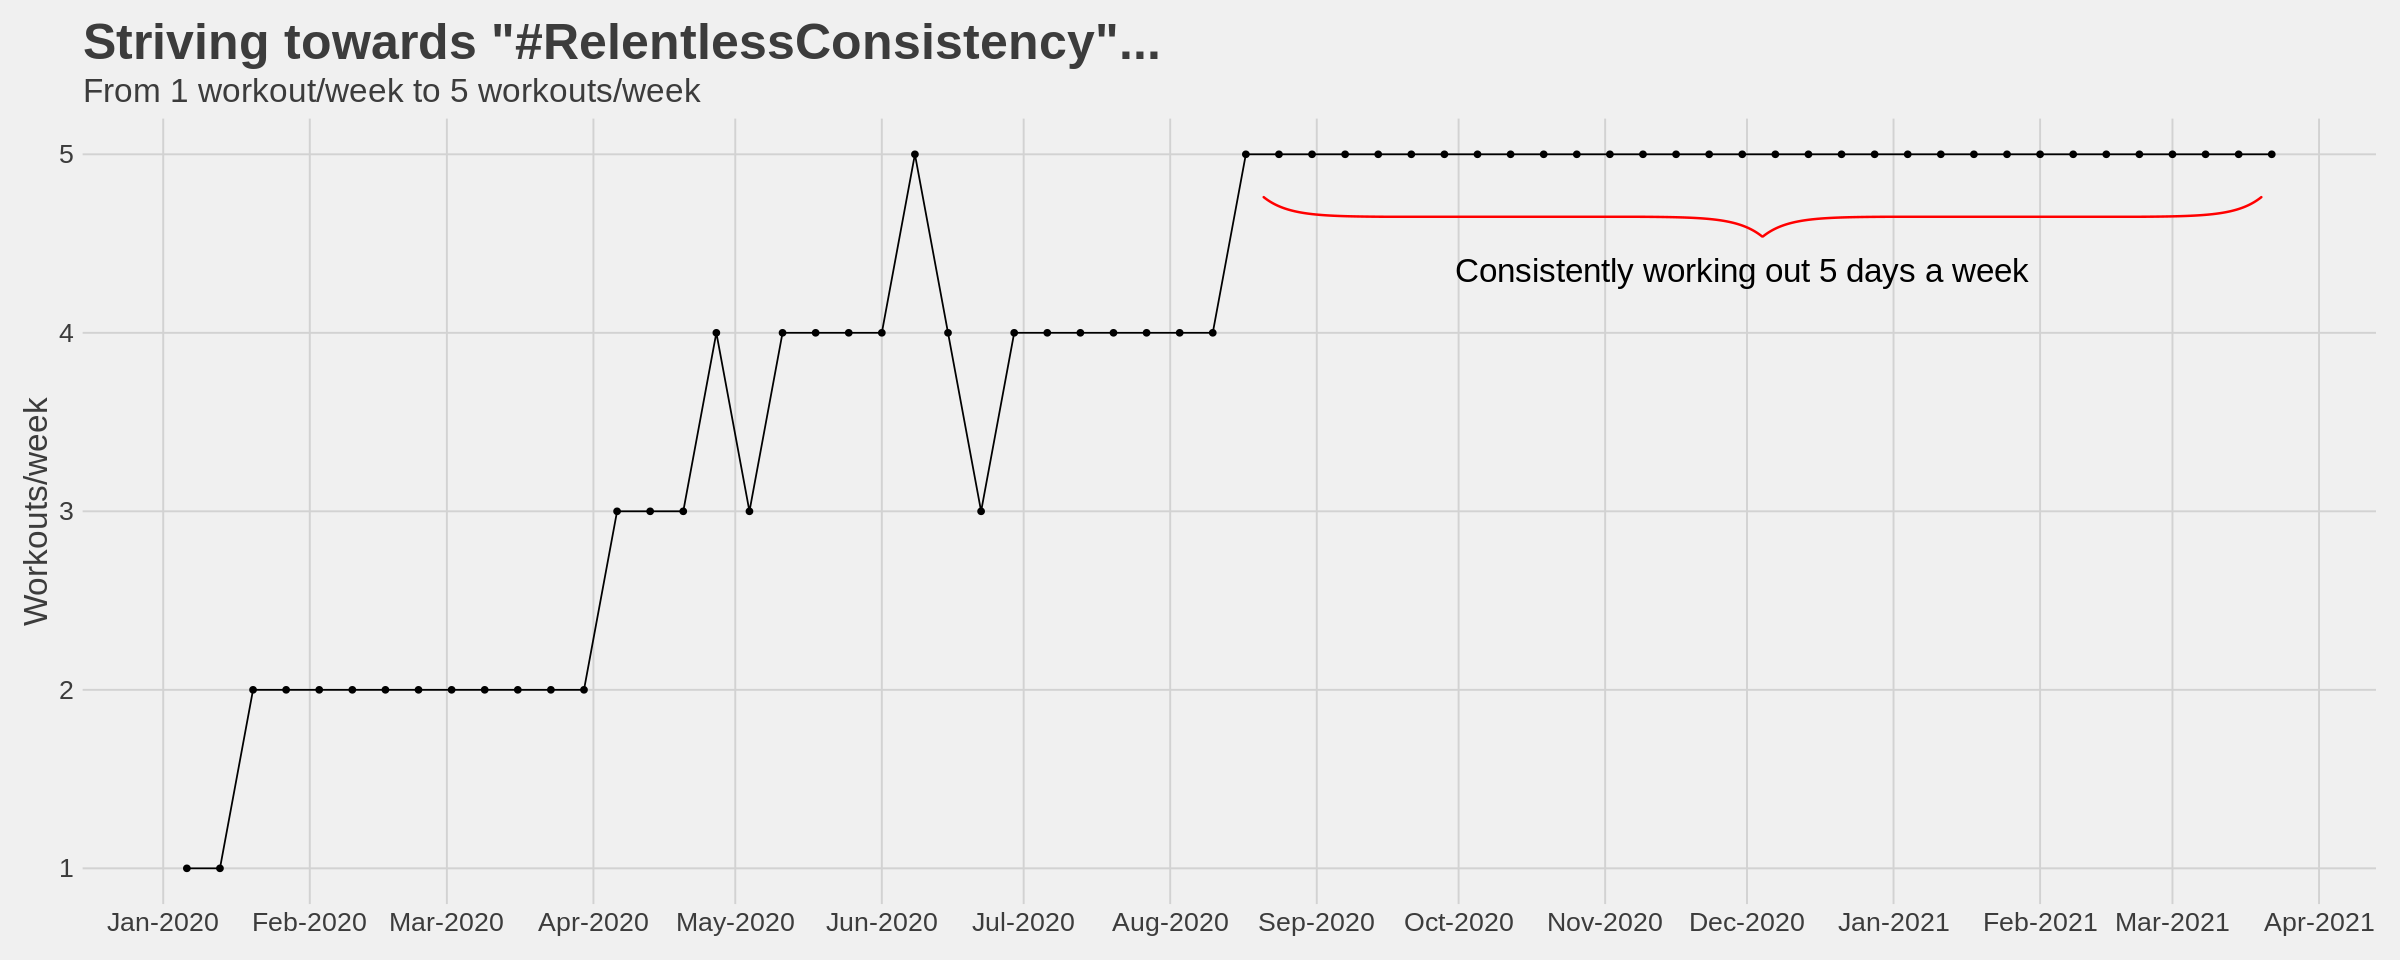

In [27]:
library(grid)
library(pBrackets) 
bracketsGrob <- function(...){
l <- list(...)
e <- new.env()
e$l <- l
  grid:::recordGrob(  {
    do.call(grid.brackets, l)
  }, e)
}

# note that units here are "npc", the only unit (besides physical units) that makes sense
# when annotating the plot panel in ggplot2 (since we have no access to 
# native units)

b1 <- bracketsGrob(0.33, 0.05, 0, 0.05, h=0.05, lwd=2, col="red")
b1 <- bracketsGrob(x2=0.515, y2=0.9, x1=0.95, y1=0.9, h=0.05, lwd=2, col="red")

p2 <- p + 
  annotation_custom(b1)
p2

In [28]:
df_wt <- read_csv(file.path("data", "Amit.csv"))
head(df_wt)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Weight = col_double(),
  BMI = col_double(),
  `Body Fat` = col_double(),
  `Lean Mass` = col_double(),
  `Muscle Percentage` = col_double(),
  `Water Percentage` = col_double()
)



Date,Weight,BMI,Body Fat,Lean Mass,Muscle Percentage,Water Percentage
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-03-17,192.90,29.2,27.8,139.28,38.9,52.7
2021-03-16,193.34,29.3,27.9,139.40,38.8,52.6
2021-03-15,195.99,29.7,28.4,140.33,38.7,52.3
2021-03-14,194.67,29.5,28.1,139.97,38.8,52.5
2021-03-13,193.60,29.5,28.1,139.97,38.8,52.5
2021-03-12,194.89,29.5,28.2,139.93,38.7,52.4


In [29]:
df_wt2 <- df_wt %>%
  select(Date, Weight) %>%
  mutate(Weight = as.integer(Weight/10)*10) %>%
  count(Weight) %>%
  mutate(Weight = glue("{Weight}s ({n} days)"))
df_wt2

,Weight,n
,<glue>,<int>
1,190s (96 days),96
2,200s (150 days),150
3,210s (53 days),53
4,220s (64 days),64
5,230s (35 days),35
6,240s (18 days),18
7,250s (4 days),4


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



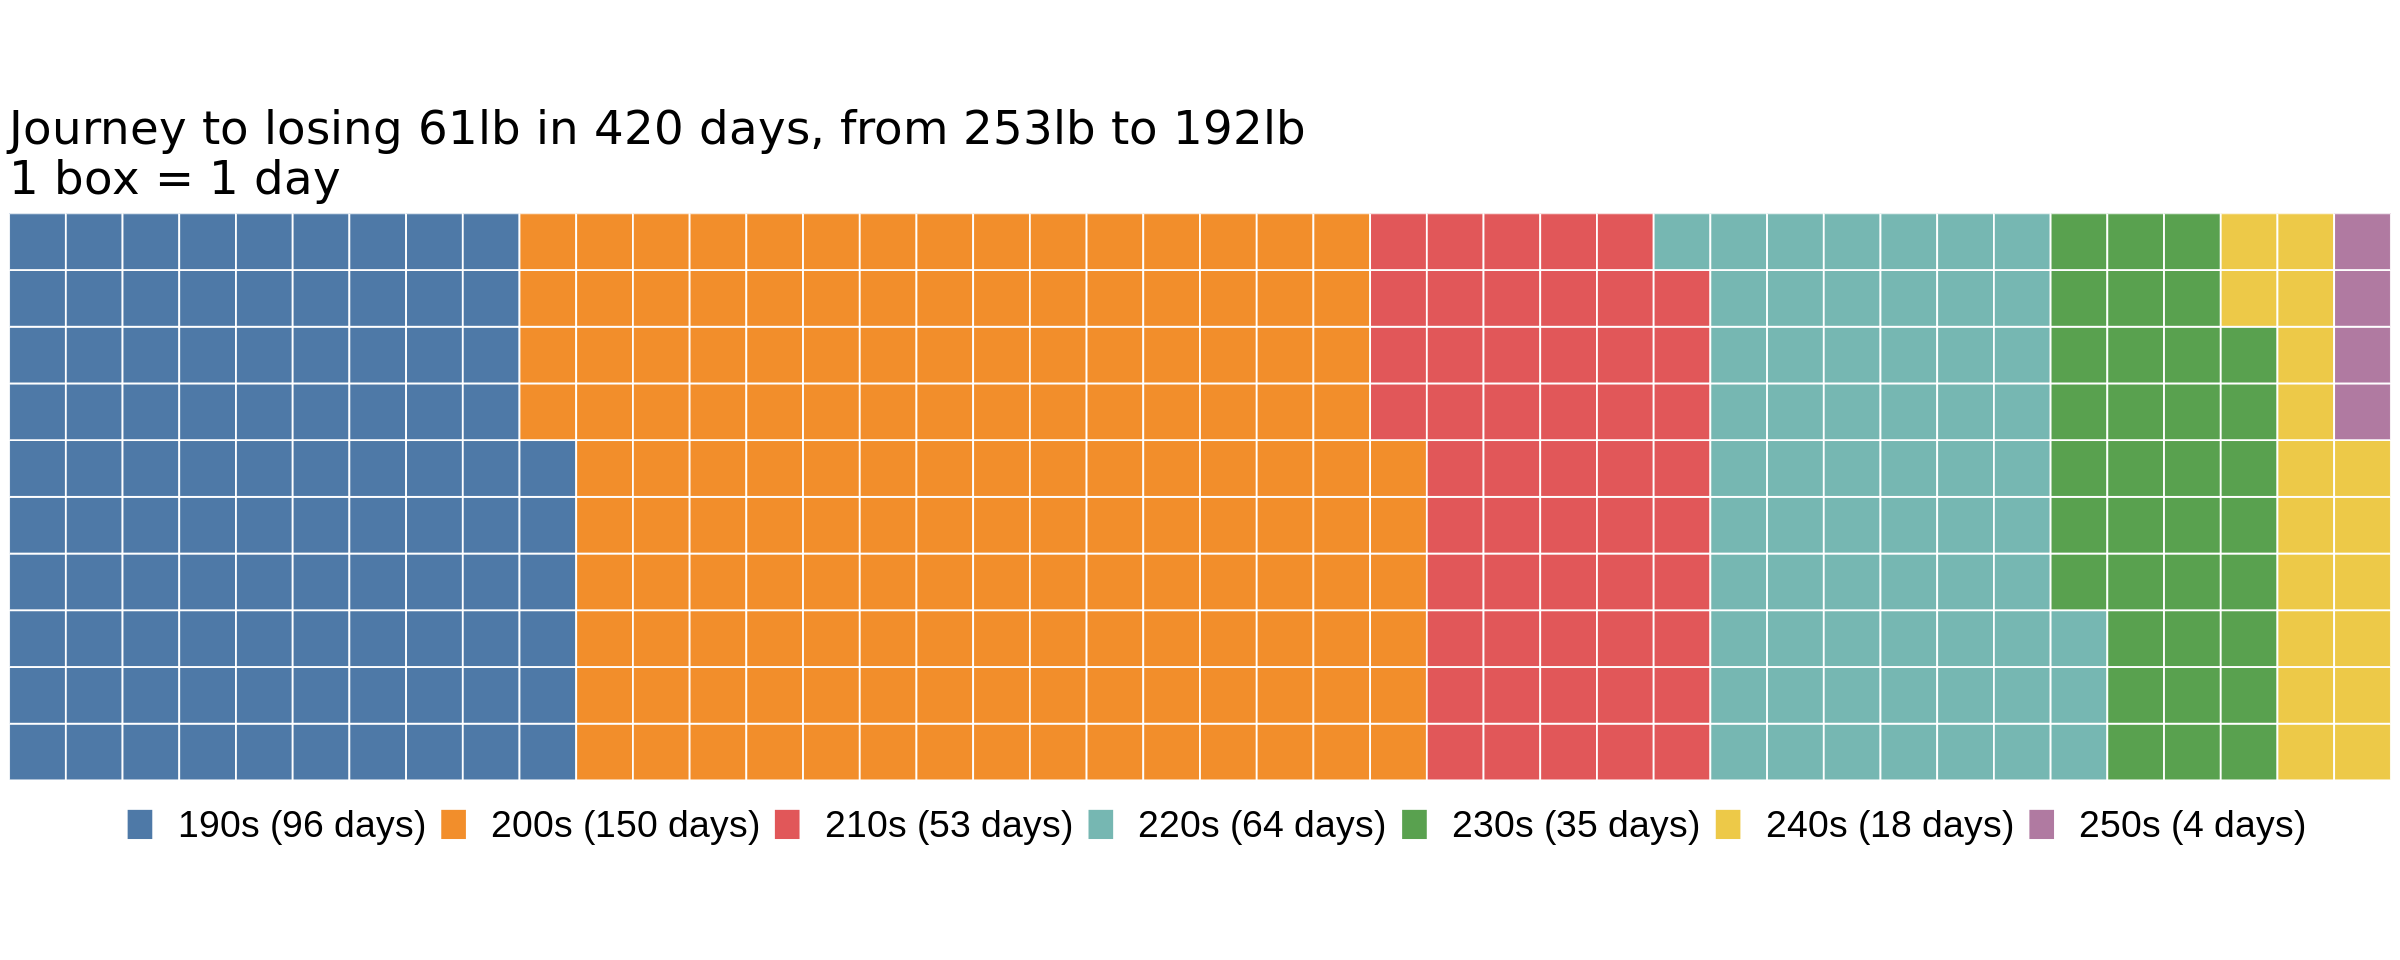

In [31]:
library(waffle)
library(ggtext)
text_col <- "#d0cfcd"
light_col <- "#fff1af"
dark_col <- "#585350"
title_col <- "#fc8431"
text_col <- "#d0cfcd"
bg_col <- "#0d101f"
p2_days_counts_as_list <- unlist(df_wt2$n)
names(p2_days_counts_as_list) <- df_wt2$Weight
title <- glue("Journey to losing 61lb in {sum(p2_days_counts_as_list)} days, from {as.integer(max(df_wt$Weight))}lb to {as.integer(min(df_wt$Weight))}lb")
subtitle <- glue("1 box = 1 day")
waffle(
  p2_days_counts_as_list, rows=10, size = 0.5, legend_pos = "bottom",
  #colors = c("#c7d4b6", "#a3aabd", "#a0d0de"),
  title = glue("{title}\n{subtitle}")) + 
theme(text = element_text(size=28)) +
theme(plot.title = element_text(size=28, family="Helvetica Bold")) +
guides(fill = guide_legend(nrow = 1)) +
  ggthemes::scale_fill_tableau(name=NULL) 